In [1]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Final_Data.csv')
features_list = ['CEOScore', 'AnalystScore', 'OtherExecScore', 'CEO_Word_Count', 'Analyst_Word_Count', 'OtherExec_Word_Count', \
               'CEO_Sent_Count', 'Analyst_Sent_Count', 'OtherExec_Sent_Count', 'CEO_Pos_Fin', 'CEO_Neg_Fin', 'CEO_Fin_Score2', \
               'Openness_Raw', 'Concientiousness_Raw', 'Extraversion_Raw', 'Agreeableness_Raw', 'Neuroticism_Raw'\
                 , 'marketcap', 'pricetobook', 'dividendyield', 'revenuegrowth', 'freecashflow', 'ebitda']
df = df[features_list]
#drop rows with null values
df.replace('nm', pd.np.nan, inplace=True)
df.dropna(inplace=True)
df = df.replace('%','',regex=True).astype('float')

# Transformations

0.015493440723645693
9.08691367276981e-06
4.063012511718558e-09
0.0011603611450630735
1.3153611493874196e-07


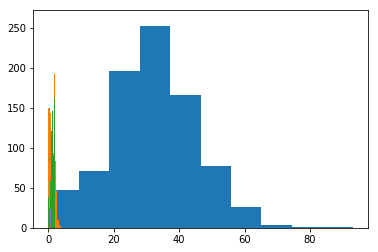

In [3]:
plt.hist(np.power(df['Analyst_Sent_Count'], .75))
stat, p = normaltest(np.power(df['Analyst_Sent_Count'], .75))
print(p)
plt.hist(np.log(df['CEO_Neg_Fin'] + 1))
stat, p = normaltest(np.log(df['CEO_Neg_Fin'] + 1))
print(p)
plt.hist(np.power(df['CEO_Fin_Score2'] + 1, .9))
stat, p = normaltest(np.power(df['CEO_Fin_Score2'] + 1, .9))
print(p)
plt.hist(np.power(df['Extraversion_Raw'], 1))
stat, p = normaltest(np.power(df['Extraversion_Raw'], 1))
print(p)
plt.hist(np.power(df['Agreeableness_Raw'], 1.7))
stat, p = normaltest(np.power(df['Agreeableness_Raw'], 1.7))
print(p)

In [4]:
#transformations already made
df['CEOScore_sqrt'] = np.power(df['CEOScore'], .5)
df.drop('CEOScore', axis=1, inplace=True)
df['CEO_Word_Count_sqrt'] = np.power(df['CEO_Word_Count'], .5)
df.drop('CEO_Word_Count', axis=1, inplace=True)
df['CEO_Sent_Count_sqrt'] = np.power(df['CEO_Sent_Count'], .5)
df.drop('CEO_Sent_Count', axis=1, inplace=True)
df['OtherExec_Sent_Count_sqrt'] = np.power(df['OtherExec_Sent_Count'], .5)
df.drop('OtherExec_Sent_Count', axis=1, inplace=True)
df['CEO_Pos_Fin_sqrt'] = np.power(df['CEO_Pos_Fin'], .5)
df.drop('CEO_Pos_Fin', axis=1, inplace=True)
df['AnalystScore_pwr'] = np.power(df['AnalystScore'], 1.7)
df.drop('AnalystScore', axis=1, inplace=True)
df['OtherExec_Word_Count_pwr'] = np.power(df['OtherExec_Word_Count'], .6)
df.drop('OtherExec_Word_Count', axis=1, inplace=True)
#change the feature list
features_list = ['CEOScore_sqrt', 'AnalystScore_pwr', 'OtherExecScore', 'CEO_Word_Count_sqrt', 'Analyst_Word_Count', 'OtherExec_Word_Count_pwr', \
               'CEO_Sent_Count_sqrt', 'Analyst_Sent_Count', 'OtherExec_Sent_Count_sqrt', 'CEO_Pos_Fin_sqrt', 'CEO_Neg_Fin', 'CEO_Fin_Score2', \
               'Openness_Raw', 'Concientiousness_Raw', 'Extraversion_Raw', 'Agreeableness_Raw', 'Neuroticism_Raw'\
                 , 'marketcap', 'pricetobook', 'dividendyield', 'revenuegrowth', 'freecashflow', 'ebitda']

#make the scores positive
df['Openness_Raw'] = df['Openness_Raw'] + 1
df['Concientiousness_Raw'] = df['Concientiousness_Raw'] + 1
df['Extraversion_Raw'] = df['Extraversion_Raw'] + 1
df['Agreeableness_Raw'] = df['Agreeableness_Raw'] + 1
df['Neuroticism_Raw'] = df['Neuroticism_Raw'] + 1
for f in features_list:
    if df[f].min() <= 0:
        df[f] = df[f] + np.abs(df[f].min()) + 1

In [1]:
alpha = .05
non_normal = []
for f in features_list:
    try:
        stat, p = normaltest(df[f])
        if p <= alpha:
            non_normal.append(f)
    except:
        print("Error with %s" %f)
print("Features Left to Normalize: %d" %len(non_normal))
non_normal

NameError: name 'features_list' is not defined

In [14]:
for f in non_normal:
    try:
        best_p = 0
        for i in range(-100, 100, 1):
            new_arr = boxcox(df[f], i/100)
            stat, p = normaltest(new_arr)
            if p > best_p:
                best_p = p
        if best_p <= alpha:
            print(f)
            print(best_p)
        else:
            print("A" + f)
    except:
        print("Error with %s" %f)

OtherExecScore
2.751985805383339e-29
Analyst_Word_Count
7.0946365990280164e-09
Analyst_Sent_Count
0.023293501305064666
CEO_Neg_Fin
0.004669784442948634
CEO_Fin_Score2
1.684888044187062e-08
Extraversion_Raw
0.021016450962153415
Agreeableness_Raw
0.0010108346150440922
Neuroticism_Raw
4.206450697431441e-17
marketcap
2.402223094129702e-30
pricetobook
0
dividendyield
3.5587910521393077e-28
revenuegrowth
3.987833841844092e-93
freecashflow
3.4826232460334682e-59
ebitda
6.106096018162707e-69


In [7]:
non_normal = []
for f in features_list:
    try:
        stat, p = normaltest(df[f])
        if p <= alpha:
            non_normal.append(f)
    except:
        print("Error with %s" %f)
print("Features Left to Normalize: %d" %len(non_normal))
non_normal

Features Left to Normalize: 14


['OtherExecScore',
 'Analyst_Word_Count',
 'Analyst_Sent_Count',
 'CEO_Neg_Fin',
 'CEO_Fin_Score2',
 'Extraversion_Raw',
 'Agreeableness_Raw',
 'Neuroticism_Raw',
 'marketcap',
 'pricetobook',
 'dividendyield',
 'revenuegrowth',
 'freecashflow',
 'ebitda']

In [16]:
df.to_csv("Final_Data_Transformed.csv")